# Introduction to Statistics and Probability

06.25.20

In this brief tutorial we will work through the code that produced any data figures in the presentation. When appropriate, we will include links to external data that we used.


In [3]:
# Load in packages
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd


### Correlation between letters in spelling bee word and per capita egg consumption

Here we will use data extracted from the [spurious correlations website](http://tylervigen.com/) to show the apparent relationship between these two variables.


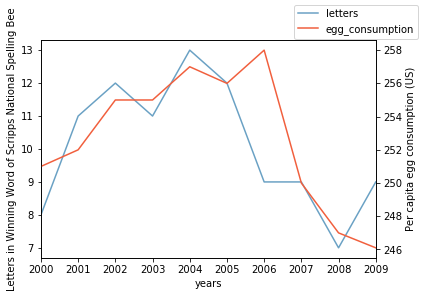

In [2]:
# Data
years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])
letters = np.array([8, 11, 12, 11, 13, 12, 9, 9, 7, 9]);
eggconsumption = np.array([251, 252, 255, 255, 257, 256, 258, 250, 247, 246.1])

# Create a pandas data frame
letterseggs_df = pd.DataFrame({"years": years, "letters":letters, "egg_consumption": eggconsumption})

# Plot using the twin y-axis
ax = letterseggs_df.plot(x="years", y="letters", legend=False, color = "#6aa1c4")
ax2 = ax.twinx()
letterseggs_df.plot(x="years", y="egg_consumption", ax=ax2, legend=False, color="#f15f3d")
ax.figure.legend()
ax.set_ylabel("Letters in Winning Word of Scripps National Spelling Bee")
ax2.set_ylabel("Per capita egg consumption (US)");


# Uncomment to save figure
# plt.savefig("figure1.pdf")

Pearson r: 0.6829084616792721
Covariance: 5.576666666666667


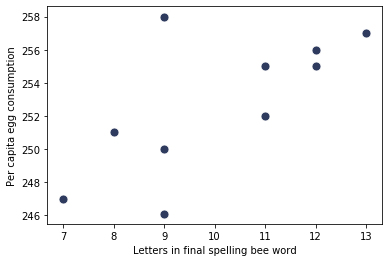

In [3]:
# Calculate the Pearson correlation and the covariance with scipy and numpy
print(f'Pearson r: {stats.pearsonr(letters,eggconsumption)[0]}')
print(f'Covariance: {np.cov(letters,eggconsumption)[0,1]}')

# Plot as a scatterplot with seaborn
fig12 = sns.scatterplot(letters, eggconsumption, color = "#2f3b5e", s=80)
fig12.set(xlabel="Letters in final spelling bee word", ylabel="Per capita egg consumption");

# Uncomment to save
# plt.savefig("figure2.pdf")

### Gene expression of genes wtihin cancer cell line

Below we will use data from the [Achilles DepMap](https://depmap.org/portal/download/) portal. The data is free to download. We will use the `sample_info.csv` and the `CCLE_expression.csv` files. The `sample_info.csv` file contains the cell line name that is associated with the cell line ID. We will use this conversion to extract the gene expression from the A375_SKIN cell line in the `CCLE_expression.csv` file.

In [4]:
# Read in the files with pandas
depmap_info = pd.read_csv("data/sample_info.csv")
depmap_expression_raw = pd.read_csv("data/CCLE_expression.csv")

# Clean the data so it's easier to work with
depmap_expression_cellIDs = depmap_expression_raw["Unnamed: 0"]
depmap_expression_raw.pop('Unnamed: 0')
depmap_expression_raw['DepMap_ID'] = depmap_expression_cellIDs
print(len(depmap_expression_raw.columns))
nGenes = len(depmap_expression_raw.columns)-1
print(f'Found {nGenes} genes')

19145
Found 19144 genes


In [5]:
# Extract gene expression for the A375_SKIN line
depmap_expression = pd.merge(depmap_expression_raw,depmap_info,on = "DepMap_ID", how= "left")
a375_all_data = depmap_expression.loc[depmap_expression["CCLE_Name"] == "A375_SKIN", :]
a375_expression = a375_all_data.iloc[0, 0:nGenes]

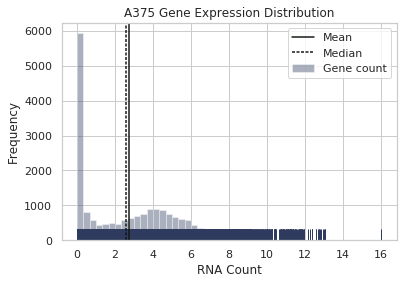

Mean: 2.731079112579036
Median: 2.57531233068744
Mode: 0.0


In [6]:
# Plot the distribution of the population with seaborn

# Styling
sns.set(style="whitegrid", palette="dark")
mean_color = '#141912'
median_color = '#141912'

# Plot with distplot to get the distribution and rug plot.
# To get the rug plot by itself, use sns.rugplot
fig = sns.distplot(a375_expression, kde = False, label = 'Gene count', rug=True, color="#2f3b5e")
fig.axvlined
fig.axvline(a375_expression.median(), label = 'Median', color = median_color, dashes = (2,1,2,1))
fig.set(xlabel='RNA Count', ylabel='Frequency', title = "A375 Gene Expression Distribution")
fig.legend()
plt.show()

# Calculate measures of location
print(f'Mean: {a375_expression.mean()}')
print(f'Median: {a375_expression.median()}')
print(f'Mode: {a375_expression.mode()[0]}')

# Uncomment to save
# fig.figure.savefig("figure3.pdf")

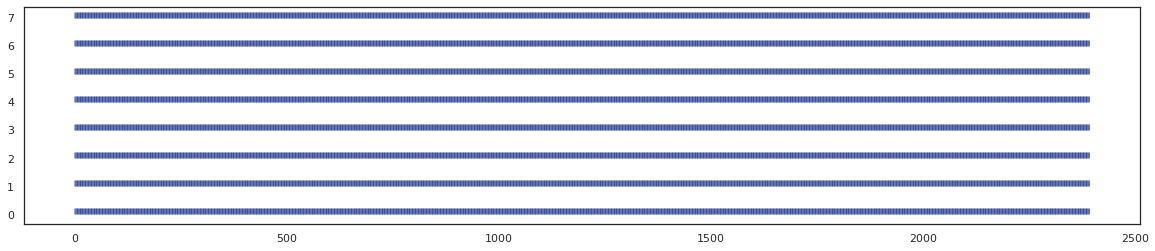

In [7]:
# For fun, let's create a plot in which every line represents one gene. To better distinguish the lines we'll
# break them into 8 lines

nr = 8
nc = nGenes/nr
x = []
y= []
for i in np.arange(nr):
    for j in np.arange(nc):
        x.append(i)
        y.append(j)
        
# Plot
sns.set_style("white")
plt.figure(figsize=(20,4))
fig3 = sns.scatterplot(y,x, alpha = 0.5, marker=2)

# plt.savefig("figure4.pdf")

### Sampling from the gene expression data

Mean: 2.912573401748814
Standard error: 0.3705144827079859


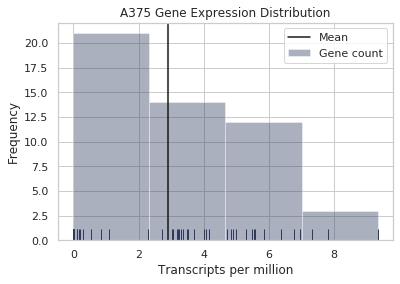

In [8]:
# Randomly sample n = 50 points from the gene expression data
n = 50
sample_1 = np.random.choice(a375_expression, n, replace = False)
print(f'Mean: {sample_1.mean()}')
print(f'Standard error: {stats.sem(sample_1)}')


sns.set_style("whitegrid")

# Plot histogram
# if we want relative frequency, set norm_hist = True
fig_1 = sns.distplot(sample_1, rug = True, kde = False, label = 'Gene count', color="#2f3b5e")
fig_1.axvline(sample_1.mean(), label = 'Mean', color = mean_color)

# The real x label is 'Transcripts per million'. In the presentation I left it as RNA count to simplify.
fig_1.set(xlabel='Transcripts per million', ylabel='Frequency', title = "A375 Gene Expression Distribution")
fig_1.legend()
plt.show()


# fig_1.figure.savefig("figure5.pdf")

### Sampling distribution of the mean

In [9]:
# Sample many times and plot the distribution of means

# Sample size -- change this value to see how the sample size affects uncertainty 
n = 100

# Number of samples we will draw
n_replicates = 1000

# Perform experiment
sample_mean_vec = np.zeros((1,n_replicates))
for rep in range(n_replicates):
    
    # Sample randomly n points from the population
    sample_i = np.random.choice(a375_expression, n, replace = False)
    
    # Compute the mean of the sample
    sample_i_mean = np.mean(sample_i)
    
    # Store the mean
    sample_mean_vec[0, rep] = sample_i_mean

print("done with experiment")

done with experiment


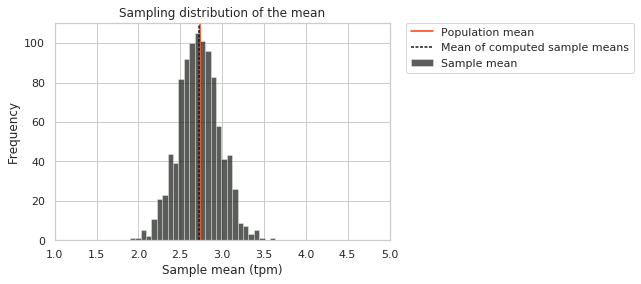

In [10]:
# Draw a histogram describing the sample means we just calculated

fig_2 = sns.distplot(sample_mean_vec, rug = False, kde = False, label = 'Sample mean',
                     hist_kws={"linewidth": 0.5,
                            "alpha": 0.7, "color": mean_color})

# Draw a vertical line for the population mean
fig_2.axvline(a375_expression.mean(), label = 'Population mean', color = '#ff3800')

# Draw a vertical line for the mean of the computed sample means
fig_2.axvline(np.mean(sample_mean_vec), label = 'Mean of computed sample means', color = mean_color, dashes = (2,1,2,1))
fig_2.set(xlabel='Sample mean (tpm)', ylabel='Frequency', title = "Sampling distribution of the mean", xlim=(1,5))
fig_2.legend()
lgd = plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad = 0.0)
plt.show()


# fig_2.figure.savefig("figure6.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')

done with experiment


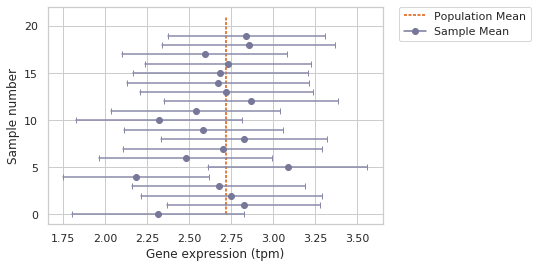

In [11]:
# Confidence interval experiment -- what does the 95% confidence interval mean?

# Draw samples of size n from the gene expression data
n = 100

# Draw 20 samples
n_replicates = 20

# As before, create these samples from the data
sample_vec = np.zeros((n,n_replicates))

for rep in range(n_replicates):
    
    # Sample randomly n points from the population
    sample_i = np.random.choice(a375_expression, n, replace = False)
     
    # Store the sample
    sample_vec[:, rep] = sample_i
    

print("done with experiment")

# Plot using a horizontal box plot approach
plt.plot([np.mean(sample_mean_vec), np.mean(sample_mean_vec)], [0,21], label = 'Population Mean',
         color = "#df5500", dashes = (2,1,2,1))

for rep in range(n_replicates):
    
    # Calculate standard error of the mean
    sem_sample = stats.sem(sample_vec[:,rep])
    ci_left = np.mean(sample_vec[:, rep]) - 2*sem_sample
    ci_right = np.mean(sample_vec[:, rep]) + 2*sem_sample
    
    # Plot the intervals
    plt.plot([ci_left, ci_right], [rep, rep], marker = '|', color = '#8989aa')
    if rep == 0:
        plt.plot([np.mean(sample_vec[:, rep])], rep, marker = 'o', color = '#777799', label = 'Sample Mean')
    else:
        plt.plot([np.mean(sample_vec[:, rep])], rep, marker = 'o', color = '#777799')
    

# Finalize the plot
plt.legend()
plt.xlabel('Gene expression (tpm)')
plt.ylabel('Sample number')
lgd = plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad = 0.0)

# plt.savefig("figure7.pdf, bbox_inches='tight')

([<matplotlib.axis.XTick at 0x7f494a5c65c0>,
 <a list of 5 Text xticklabel objects>)

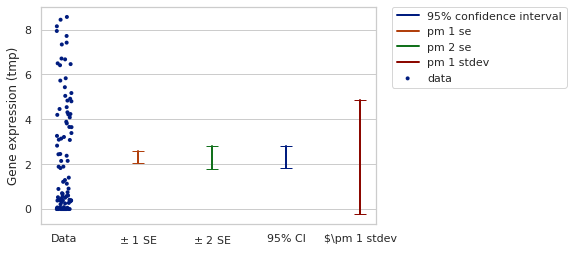

In [12]:
# Comparing standard error, standard deviation, and confidence interval.
# Not in the presentation, but a helpful plot nonetheless

# Create a figure that shows the data, plus/minus 1 SE, 2 SE, 1 STDEV, and the 95% confidence interval

# Plotting the data
fig_4 = sns.stripplot(sample_vec[:, 0], jitter = 0.05, size = 4, orient = 'v', label = 'data')

# Calculate SE, STDEV, CIs
sem_sample = stats.sem(sample_vec[:,0], ddof = 1)
sample_mean = np.mean(sample_vec[:,0])
ci_left = np.mean(sample_vec[:, 0]) - 1.96*sem_sample
ci_right = np.mean(sample_vec[:, 0]) + 1.96*sem_sample
stdev_sample = np.std(sample_vec[:, 0], ddof = 1)

# Add to plot 
plt.plot([1.5, 1.5], [ci_left, ci_right], label = '95% confidence interval', lw = 2, marker = '_', markersize = 12)
plt.plot([0.5, 0.5], [sample_mean - sem_sample, sample_mean + sem_sample], label = 'pm 1 se', lw = 2, marker = '_', markersize = 12)
plt.plot([1, 1], [sample_mean - 2*sem_sample, sample_mean + 2*sem_sample], label = 'pm 2 se', lw = 2, marker = '_', markersize = 12)
plt.plot([2, 2], [sample_mean - stdev_sample, sample_mean + stdev_sample], label = 'pm 1 stdev', lw = 2, marker = '_', markersize = 12)

lgd = plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad = 0.0)
plt.ylabel('Gene expression (tmp)')
plt.xticks(np.arange(5)/2, ('Data', r'$\pm$ 1 SE', r'$\pm$ 2 SE', '95% CI', r'$\pm 1 stdev'))


# plt.savefig('figure8.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

### Catan dice rolls

Between 2016 and 2019, [Taylor Patch](https://github.com/tcpatch) recorded the roll of every turn in every game of Catan we played. In the next cell I have pasted the data he collected.

In [13]:
# Define data vector
dice_rolls = [5,7,7,3,12,3,8,6,8,4,5,9,8,8,9,7,10,7,12,2,7,11,3,9,6,3,8,7,5,2,7,3,5,12,7,2,2,3,8,8,8,4,7,7,4,8,7,8,10,8,6,10,4,9,6,7,3,9,11,5,8,7,11,5,5,5,9,8,7,5,10,4,9,4,8,7,11,6,8,7,10,9,8,3,7,8,2,8,11,4,10,8,11,5,5,9,8,7,7,8,3,4,5,8,8,8,6,8,5,11,8,9,5,2,4,5,5,9,5,5,7,7,8,7,4,4,8,11,4,8,7,5,10,7,7,4,10,7,11,9,9,7,2,7,5,8,6,3,5,9,7,6,7,6,6,5,6,3,3,8,8,12,9,3,4,6,9,12,10,9,6,9,10,5,11,7,9,8,7,2,7,4,7,10,4,11,11,7,6,2,12,11,4,10,7,6,4,11,7,10,5,6,9,5,2,11,9,7,8,7,2,6,3,5,6,3,2,8,6,6,10,7,10,7,5,10,7,6,7,6,9,5,7,3,10,4,4,2,10,7, 7, 7, 3, 7, 3, 8, 8, 9, 5, 3, 4, 6, 6, 10, 7, 6, 6, 8, 7, 8, 4, 3, 8, 5, 12, 8, 4, 3, 11, 10, 8, 7, 9, 11, 9, 5, 7, 9, 3, 10, 7, 6, 8, 7, 6, 10, 6, 5, 8, 4, 9, 2, 6, 5, 5, 8, 7, 5, 7, 5, 2, 10, 10, 8, 11, 9, 10, 4, 6, 8, 4, 10, 6, 4, 7, 8, 8, 7, 7, 11, 8, 5, 9, 8, 6, 3, 6, 5, 6, 7, 6, 9, 7, 11, 7, 4, 9, 7, 11, 8, 4, 7, 3, 7, 9, 2, 10, 5, 9, 6, 4, 6, 4, 7, 7, 10, 8, 9, 7, 6, 9, 6, 7, 4, 6, 9, 6, 8, 7, 5, 6, 8, 4, 3, 7, 6, 6, 3, 8, 7, 7, 7, 4, 8, 8, 12, 9, 4, 11, 9, 8, 6, 7, 7, 4, 9, 8, 9, 3, 7, 10, 9, 10, 6, 6, 5, 9, 11, 7, 5, 7, 8, 3, 7, 7, 8, 6, 3, 8, 7, 4, 3, 8, 6, 10, 8, 7, 11, 3, 7, 11, 7, 11, 11, 11, 4, 6, 8, 5, 5, 3, 10, 8, 5, 6, 12, 5, 11, 11, 12, 4, 5, 9, 5, 9, 4, 10, 7, 6, 7, 8, 8, 2, 7, 7, 7, 6, 8, 3, 6, 5, 4, 10, 8, 7, 4, 8, 9, 7, 4, 8, 10, 7, 9, 5, 6, 9, 8, 5, 7, 7, 4, 9, 11, 6, 10, 3, 10, 6, 7, 5, 6, 5, 7, 3, 5, 5, 8, 11, 6, 8, 9, 10, 6, 3, 5, 7, 5, 7, 6, 2, 10, 6, 4, 8, 5, 6, 10, 5, 11, 8, 8, 5, 11, 7, 8, 7, 6, 7, 9, 2, 7, 4, 6, 8, 2, 9, 8, 10, 8, 7, 4, 7, 5, 4, 5, 7, 11, 7, 6, 8, 8, 5, 11, 9, 9, 10, 3, 2, 7, 5, 7, 8, 8, 10, 9, 7, 9, 7, 7, 8, 6, 8, 5, 7, 11, 6, 8, 10, 7, 9, 8, 5, 8, 7, 8, 10, 5, 4, 6, 8, 6, 11, 7, 4, 9, 10, 7, 7, 5, 11, 7, 8, 5, 10, 3, 12, 9, 7, 9, 3, 5, 11, 9, 5, 10, 4, 3, 8, 5, 6, 8, 3, 8, 9, 3, 10, 5, 6, 6, 10, 9, 7, 6, 7, 9, 11, 7, 6, 8, 11, 6, 6, 7, 2, 9, 6, 12, 10, 12, 7, 9, 9, 10, 5, 6, 10, 6, 7, 8, 4, 6, 4, 7, 4, 7, 10, 5, 6, 9, 8, 12, 8, 10, 5, 4, 6, 9, 12, 10, 3, 6, 9, 9, 6, 5, 5, 8, 8, 6, 11, 5, 4, 2, 8, 3, 10, 11, 11, 3, 7, 11, 6, 5, 10, 8, 7, 6, 7, 10, 7, 9, 7, 4, 8, 7, 11, 8, 6, 8, 10, 2, 7, 7, 8, 8, 8, 8, 10, 10, 4, 5, 8, 6, 6, 4, 11, 2, 8, 6, 8, 7, 8, 10, 6, 6, 6, 11, 8, 8, 4, 6, 8, 10, 3, 8, 7, 7, 8, 7, 2, 4, 4, 6, 8, 6, 4, 11, 10, 7, 7, 5, 9, 4, 9, 11, 6, 4, 9, 11, 6, 8, 3, 9, 6, 7, 5, 5, 7, 4, 8, 6, 11, 8, 7, 4, 11, 3, 11, 9, 7, 12, 7, 7, 3, 10, 8, 8, 10, 3, 8, 8, 9, 3, 7, 8, 8, 8, 7, 8, 8, 2, 9, 8, 4, 8, 7, 3, 8, 2, 9, 7, 7, 10, 8, 10, 3, 7, 6, 7, 3, 9, 4, 6, 10, 7, 8, 9, 10, 8, 6, 8, 4, 5, 9, 8, 8, 7, 7, 8, 4, 9, 7, 8, 5, 4, 3, 8, 11, 6, 4, 7, 6, 5, 6, 5, 10, 6, 11, 3, 9, 8, 7, 9, 6, 3, 7, 7, 6, 9, 10, 7, 9, 3, 10, 4, 9, 3, 9, 9, 7, 11, 3, 7, 10, 7, 12, 8, 8, 7, 9, 9, 9, 6, 8, 5, 5, 6, 7, 7, 6, 11, 11, 7, 10, 6, 10, 10, 4, 5, 6, 10, 8, 4, 11, 9, 5, 8, 2, 3, 7, 5, 7, 9, 3, 7, 4, 6, 5, 4, 11, 8, 3, 6, 4, 8, 8, 5, 10, 11, 6, 4, 10, 7, 11, 6, 10, 7, 3, 4, 11, 5, 8, 8, 6, 9, 10, 6, 7, 9, 3, 5, 7, 6, 6, 11, 9, 3, 10, 9, 7, 5, 6, 4, 10, 9, 10, 4, 9, 7, 6, 7, 6, 8, 9, 10, 9, 10, 7, 8, 4, 9, 5, 5, 8, 9, 7, 4, 7, 4, 6, 9, 7, 4, 5, 5, 10, 7, 8, 9, 8, 9, 7, 9, 9, 7, 9, 9, 7, 10, 7, 5, 9, 8, 8, 5, 4, 10, 11, 4, 10, 5, 11, 8, 4, 5, 12, 12, 7, 10, 10, 8, 7, 9, 7, 5, 7, 9, 7, 9, 7, 12, 9, 9, 2, 6, 7, 7, 4, 9, 7, 4, 3, 10, 11, 5, 4, 9, 6, 10, 9, 2, 6, 7, 8, 10, 7, 6, 5, 9, 8, 7, 8, 8, 2, 10, 11, 6, 7, 6, 6, 7, 6, 6, 6, 9, 9, 9, 9, 11, 5, 6, 4, 10, 4, 7, 5, 11, 8, 8, 9, 8, 4, 3, 9, 6, 5, 7, 8, 7, 4, 7, 4, 5, 3, 3, 8, 6, 2, 7, 4, 6, 10, 7, 7, 9, 5, 7, 6, 8, 8, 6, 8, 6, 10, 9, 8, 8, 12, 9, 11, 6, 8, 7, 8, 5, 10, 7, 8, 7, 6, 5, 5, 6, 7, 4, 7, 10, 10, 6, 8, 8, 7, 8, 10, 9, 11, 3, 3, 8, 3, 9, 9, 2, 3, 7, 7, 6, 8, 11, 5, 7, 6, 5, 6, 7, 5, 7, 9, 5, 6, 3, 10, 5, 9, 11, 6, 11, 8, 5, 10, 10, 8, 6, 4, 6, 3, 6, 5, 6, 8, 2, 7, 8, 8, 8, 8, 7, 7, 5, 10, 7, 3, 8, 2, 4, 8, 9, 6, 7, 8, 2, 2, 8, 7, 10, 6, 6, 10, 9, 4, 10, 10, 7, 10, 9, 6, 7, 4, 3, 6, 7, 8, 7, 11, 8, 9, 7, 4, 7, 9, 4, 6, 7, 8, 10, 5, 7, 6, 6, 6, 6, 4, 7, 3, 6, 2, 5, 6, 10, 10, 7, 8, 8, 4, 11, 5, 7, 8, 9, 4, 6, 10, 7, 6, 8, 8, 9, 8, 9, 9, 6, 5, 4, 4, 10, 8, 9, 7, 4, 9, 5, 7, 6, 9, 6, 6, 6, 10, 5, 7, 7, 6, 8, 6, 3, 9, 5, 8, 7, 6, 6, 10, 7, 9, 10, 7, 5, 9, 6, 8, 10, 12, 8, 11, 8, 7, 5, 6, 5, 8, 10, 2, 10, 6, 6, 3, 6, 11, 5, 7, 4, 9, 8, 9, 5, 4]

Saw the number 2 rolled 40 times.
Saw the number 3 rolled 81 times.
Saw the number 4 rolled 114 times.
Saw the number 5 rolled 137 times.
Saw the number 6 rolled 187 times.
Saw the number 7 rolled 250 times.
Saw the number 8 rolled 217 times.
Saw the number 9 rolled 153 times.
Saw the number 10 rolled 125 times.
Saw the number 11 rolled 81 times.
Saw the number 12 rolled 22 times.
(11, 1)


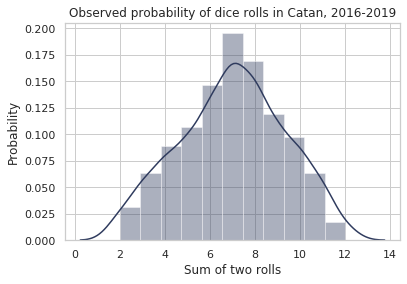

In [14]:
# Convert to numpy array
dice_rolls = np.array(dice_rolls)


# Run through the possible numbers and count the number of times each dice roll occurs.
possible_rolls = np.arange(2,13)   # Need numbers 2 - 12 inclusive.
outcome_count_array = np.zeros((len(possible_rolls),1))
for outcome in possible_rolls:
    outcome_count = sum(dice_rolls == outcome)
    print(f'Saw the number {outcome} rolled {outcome_count} times.')
    outcome_count_array[outcome-2, 0] = outcome_count
    

print(outcome_count_array.shape)

# Plot histogram of the dice rolls
fig_0 = sns.distplot(dice_rolls, color = '#2f3b5e', bins=11)
fig_0.set(xlabel = 'Sum of two rolls',
          ylabel = 'Probability',
          title = 'Observed probability of dice rolls in Catan, 2016-2019');


# plt.savefig("figure9.pdf")

### Gaussian distribution

Below we show a few examples of how to generate a Gaussian distribution. These code blocks create interactive plots that require [Bokeh](https://docs.bokeh.org/en/latest/index.html). Usually Anaconda comes with Bokeh already installed but if you get errors importing the following packages, you might need to install with pip or conda (see [installation instructions](https://docs.bokeh.org/en/latest/docs/installation.html)).

In [1]:
# Import packages
import bokeh as bk
from bokeh.palettes import Category20b
from bokeh.palettes import Magma
from bokeh.palettes import Viridis
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
output_notebook()

print(bk.__version__)

Loading BokehJS ...

1.3.4


In [4]:
# Define five values of mu, and five of sigma
mu_values = [-2, -1, 0, 1, 2]
sigma_values = [1, 0.5, 0.4, 0.7, 1.2]

# We'll pick a standard range for x values.
x_axis = np.arange(-5,5,0.01)

# Plot these five Gaussians
p = figure(plot_width=800, plot_height=500)
p.title.text = 'Click on legend entries to hide the corresponding lines'

for mu, sigma, color in zip(mu_values, sigma_values, Category20b[5]):
    norm_data = stats.norm.pdf(x_axis, loc = mu, scale = sigma)
    p.line(x_axis, norm_data, line_width=2, color= color, alpha=0.8, legend = f'mu={mu}, sigma={sigma}')

p.legend.location = "top_right"
p.legend.click_policy="hide"
p.xaxis.axis_label = 'X'
p.yaxis.axis_label = 'Probability density'

show(p)


Use a slider to explore more possible values for mu (the mean) and sigma (the standard deviation).

In [17]:
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource

# Note we make a different x axis. Doens't have to be centered at 0.
x = np.linspace(0, 100, 1000)
y = stats.norm.pdf(x, loc = 25, scale = 5)
source = ColumnDataSource(data=dict(x=x, y=y))

# Start figure
plot = figure(y_range=(0, 0.2), plot_width=600, plot_height=400)

# Plot initial line
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

# Define sliders
mu_slider = Slider(start=1, end=100, value=25, step=1, title="Mean")
sigma_slider = Slider(start=1, end=40, value=5, step=1, title="Standard Deviation")

# Javascript lets us make interactive sliders
callback = CustomJS(args=dict(source=source, mu=mu_slider, sigma=sigma_slider),
                    code="""
    const data = source.data;
    const m = mu.value;
    const s = sigma.value;
    const x = data['x']
    const y = data['y']

    for (var i = 0; i < x.length; i++) {
        y[i] = (1/(s*Math.sqrt(2*Math.PI)))*Math.exp(-Math.pow((x[i]-m),2)/(2*Math.pow(s,2)))
    }
    console.log(y)
    source.change.emit();
""")

# Defining what happens when a slider value changes. In this case, the callback function evaluates.
mu_slider.js_on_change('value', callback)
sigma_slider.js_on_change('value', callback)

# Final plot labels and things
plot.xaxis.axis_label = 'X'
plot.yaxis.axis_label = 'Probability Density'
layout = row(
    plot,
    column(mu_slider, sigma_slider),
)


show(layout)

Approximately 2/3 of the area under the curve falls between mu-sigma and mu+sigma. In other words, the probability that a randomly chosen observation sampled from a normal distribution falls between mu-sigma and mu+sigma is approximately 66.67% (68.3% exactly).

Approximately 95% of the area under the curve falls within two standard deviations of the mean

In [18]:
# Draw figure showing the area within 1, 2, or 3 sigma of the mean.

# Feel free to change mu and sigma
mu = 0
sigma = 1

# plot
p = figure(plot_width=800, plot_height=500)
p.title.text = 'Click on legend entries to hide the corresponding lines'


colors = Category20b[5]
norm_data = stats.norm.pdf(x_axis, loc = mu, scale = sigma)
p.line(x_axis, norm_data, line_width=2,alpha=0.8, legend = f'mu={mu}, sigma={sigma}', color = colors[0])
mu_plus_sigma = np.argwhere(x_axis >= (mu+sigma)).flatten()[0]
mu_minus_sigma = np.argwhere(x_axis <= (mu+sigma)).flatten()[-1]
x_range_1s = ((x_axis>(mu-sigma)) & (x_axis<(mu+sigma)))
p.varea(x_axis[x_range_1s],np.zeros((sum(x_range_1s))),
         norm_data[x_range_1s],
         fill_alpha = 0.20,
         legend = 'pm 1 sigma',
         color = colors[1])
mu_plus_2sigma = np.argwhere(x_axis >= (mu+sigma)).flatten()[0]
mu_minus_2sigma = np.argwhere(x_axis <= (mu+sigma)).flatten()[-1]
x_range_2s = ((x_axis>(mu-(2*sigma))) & (x_axis<(mu+(2*sigma))))
p.varea(x_axis[x_range_2s],np.zeros((sum(x_range_2s))),
         norm_data[x_range_2s],
         fill_alpha = 0.20,
         legend = 'pm 2 sigma',
         color = colors[2])
mu_plus_3sigma = np.argwhere(x_axis >= (mu+sigma)).flatten()[0]
mu_minus_3sigma = np.argwhere(x_axis <= (mu+sigma)).flatten()[-1]
x_range_3s = ((x_axis>(mu-(3*sigma))) & (x_axis<(mu+(3*sigma))))
p.varea(x_axis[x_range_3s],np.zeros((sum(x_range_3s))),
         norm_data[x_range_3s],
         fill_alpha = 0.20,
         legend = 'pm 3 sigma',
         color = colors[3])

p.legend.location = "top_right"
p.legend.click_policy="hide"
p.xaxis.axis_label = 'X'
p.yaxis.axis_label = 'Probability density'


show(p)